
# Drug classification database.

In [182]:
library(tidyverse)
base_drug<-read_csv("../input/drug-classification/drug200.csv")



── Column specification ────────────────────────────────────────────────────────
cols(
  Age = col_double(),
  Sex = col_character(),
  BP = col_character(),
  Cholesterol = col_character(),
  Na_to_K = col_double(),
  Drug = col_character()
)




In [183]:
head(base_drug)

Age,Sex,BP,Cholesterol,Na_to_K,Drug
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
23,F,HIGH,HIGH,25.355,DrugY
47,M,LOW,HIGH,13.093,drugC
47,M,LOW,HIGH,10.114,drugC
28,F,NORMAL,HIGH,7.798,drugX
61,F,LOW,HIGH,18.043,DrugY
22,F,NORMAL,HIGH,8.607,drugX


### Leaving all attributes in lower case.

In [184]:
library(stringr)
names(base_drug)<-str_to_lower(string = names(base_drug),locale = "en")
head(base_drug,4)

age,sex,bp,cholesterol,na_to_k,drug
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
23,F,HIGH,HIGH,25.355,DrugY
47,M,LOW,HIGH,13.093,drugC
47,M,LOW,HIGH,10.114,drugC
28,F,NORMAL,HIGH,7.798,drugX



### Checking for missing values.

In [185]:
sum(is.na(base_drug))

[1] 0


## Exploratory analysis.

In [186]:
head(base_drug,5)

age,sex,bp,cholesterol,na_to_k,drug
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
23,F,HIGH,HIGH,25.355,DrugY
47,M,LOW,HIGH,13.093,drugC
47,M,LOW,HIGH,10.114,drugC
28,F,NORMAL,HIGH,7.798,drugX
61,F,LOW,HIGH,18.043,DrugY


### Age media by gender and blood pressure levels.

`summarise()` regrouping output by 'sex' (override with `.groups` argument)



sex,bp,average_age,N
<chr>,<chr>,<dbl>,<int>
F,HIGH,37.84,38
F,LOW,46.11,28
F,NORMAL,45.23,30
M,HIGH,46.51,39
M,LOW,47.75,36
M,NORMAL,42.90,29


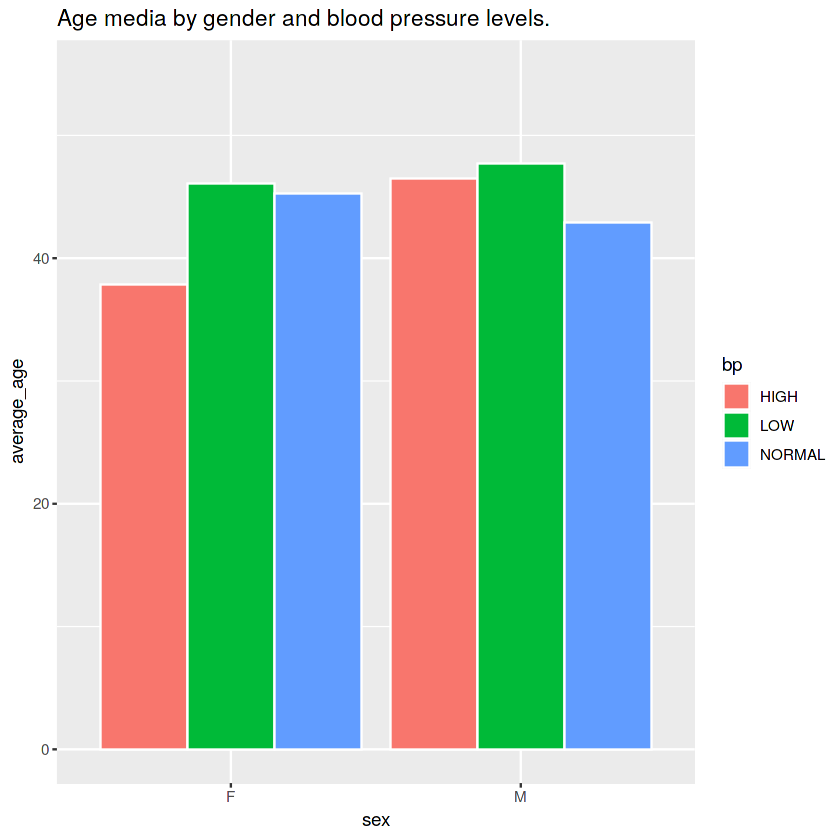

In [187]:
base_media<-base_drug %>% group_by(sex,bp)%>% summarize(average_age=round(mean(age,na.rm = TRUE),digits = 2),N=n())
base_media
ggplot(data = base_media)+
    geom_col(mapping = aes(x = sex,y = average_age,fill=bp),position = "dodge",color="white")+
        ylim(0,55)+
        ggtitle(label = "Age media by gender and blood pressure levels.")


## Cholesterol level by sex.

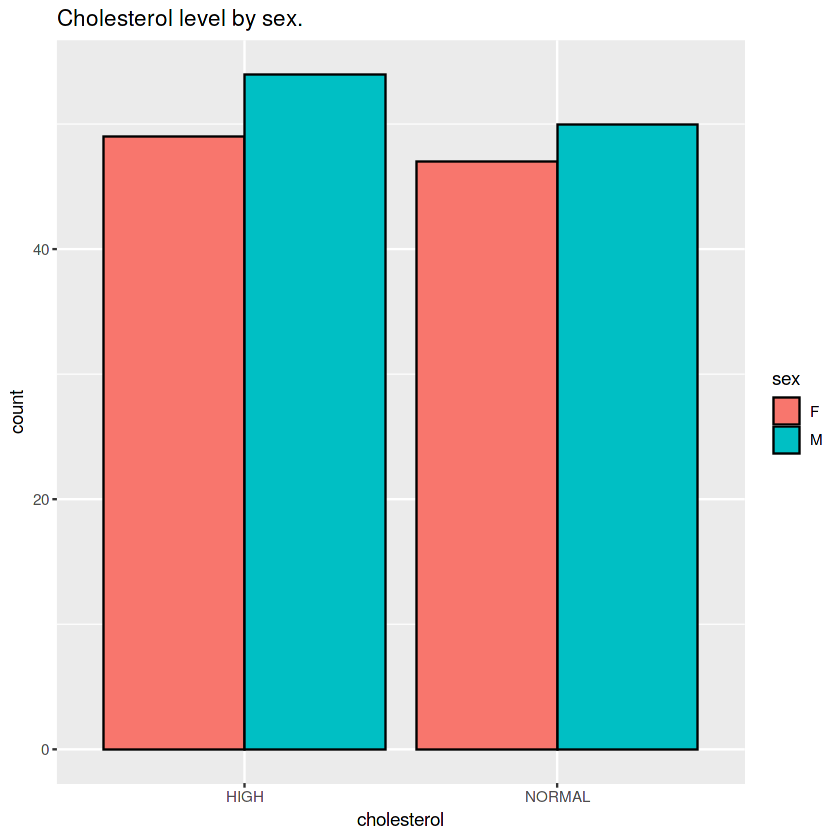

In [188]:
base_drug %>%
    ggplot()+
        geom_bar(mapping = aes(x=cholesterol,fill=sex),position = "dodge",color="black")+
            ggtitle(label = "Cholesterol level by sex.")



### Box plot for cholesterol level by age.

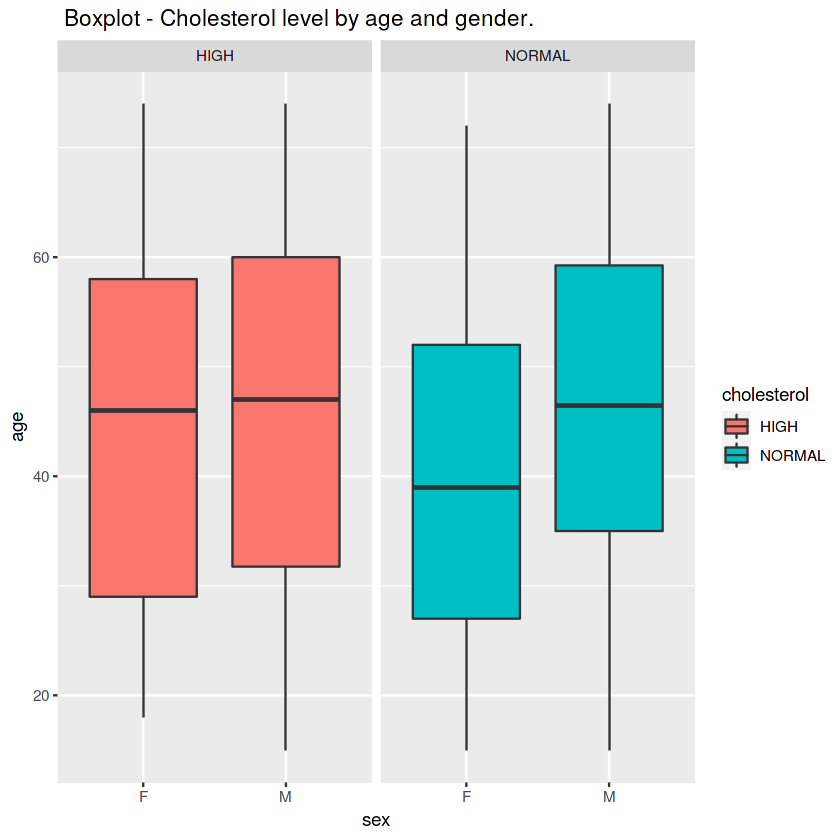

In [189]:
base_drug %>%
    ggplot()+
        geom_boxplot(mapping = aes(x = sex,y = age,fill=cholesterol))+
        facet_wrap(~cholesterol)+
        ggtitle(label = " Boxplot - Cholesterol level by age and gender.")

### The average rate of potassium by age.


`summarise()` ungrouping output (override with `.groups` argument)



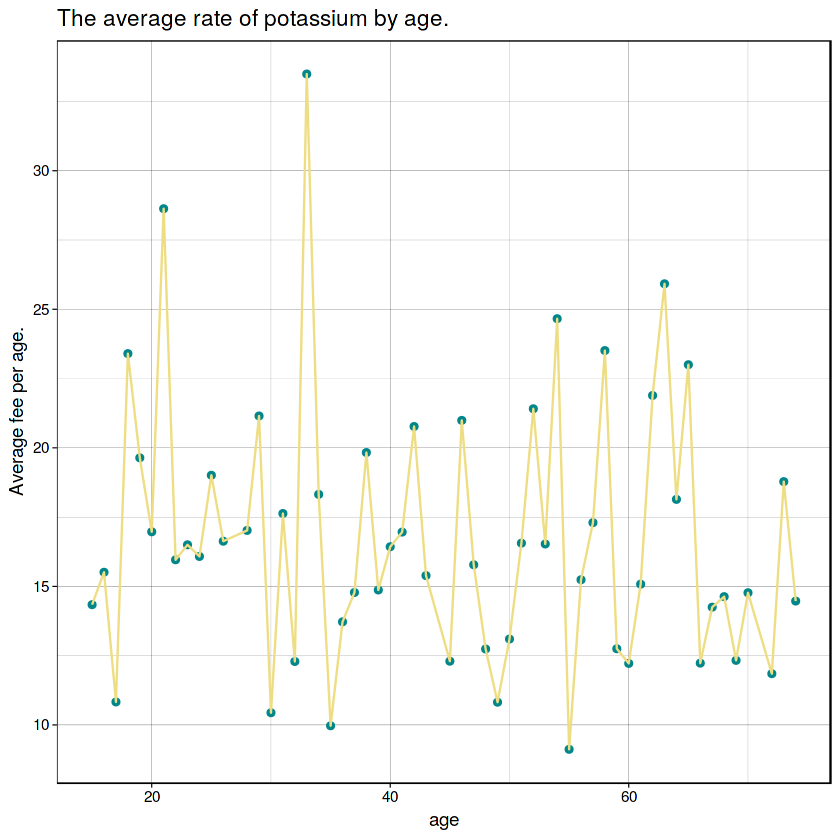

In [190]:
base_drug %>% group_by(age) %>% summarize(Average_fee_per_age=round(mean(na_to_k,na.rm = TRUE),2)) %>%
 ggplot(mapping = aes(x=age,y=Average_fee_per_age))+
        geom_point(color="#00868B")+
            geom_line(color="#EEDD82")+
            ggtitle(label = "The average rate of potassium by age.")+
                ylab(label = "Average fee per age.")+
                 theme_linedraw()

### É PRECISO QUE AOS ATRIBUTOS SEJAM NUMERICOS.


## Last letters of the predictive attribute, lower case.

In [191]:
library(stringr)
base_drug$drug<-str_to_lower(string = base_drug$drug,locale = "en")



base_drug$drug<-str_replace_all(string = base_drug$drug,pattern = "y",replacement = "Y")
base_drug$drug<-str_replace_all(string = base_drug$drug,pattern = "x",replacement = "X")
base_drug$drug<-str_replace_all(string = base_drug$drug,pattern = "a",replacement = "A")
base_drug$drug<-str_replace_all(string = base_drug$drug,pattern = "c",replacement = "C")
base_drug$drug<-str_replace_all(string = base_drug$drug,pattern = "b",replacement = "B")
base_drug$drug<-as_factor(base_drug$drug)
head(base_drug,5)



age,sex,bp,cholesterol,na_to_k,drug
<dbl>,<chr>,<chr>,<chr>,<dbl>,<fct>
23,F,HIGH,HIGH,25.355,drugY
47,M,LOW,HIGH,13.093,drugC
47,M,LOW,HIGH,10.114,drugC
28,F,NORMAL,HIGH,7.798,drugX
61,F,LOW,HIGH,18.043,drugY


## Transforming sex, bp, cholesterol and na_to_k into numerical values.

In [192]:
base_drug$sex<-as.numeric(as_factor(base_drug$sex))
base_drug$bp<-as.numeric(as_factor(base_drug$bp))
base_drug$cholesterol<-as.numeric(as_factor(base_drug$cholesterol))





head(base_drug,3)

age,sex,bp,cholesterol,na_to_k,drug
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
23,1,1,1,25.355,drugY
47,2,2,1,13.093,drugC
47,2,2,1,10.114,drugC


## Standardization of numerical values.

In [193]:
base_drug[,c(1,5)]<-scale(base_drug[,c(1,5)])
head(base_drug,3)

age,sex,bp,cholesterol,na_to_k,drug
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-1.2883580,1,1,1,1.2833018,drugY
0.1622914,2,2,1,-0.4141062,drugC
0.1622914,2,2,1,-0.8264842,drugC


In [194]:
summary(base_drug)

      age               sex             bp        cholesterol   
 Min.   :-1.7719   Min.   :1.00   Min.   :1.00   Min.   :1.000  
 1st Qu.:-0.8048   1st Qu.:1.00   1st Qu.:1.00   1st Qu.:1.000  
 Median : 0.0414   Median :2.00   Median :2.00   Median :1.000  
 Mean   : 0.0000   Mean   :1.52   Mean   :1.91   Mean   :1.485  
 3rd Qu.: 0.8272   3rd Qu.:2.00   3rd Qu.:3.00   3rd Qu.:2.000  
 Max.   : 1.7943   Max.   :2.00   Max.   :3.00   Max.   :2.000  
    na_to_k           drug   
 Min.   :-1.3587   drugY:91  
 1st Qu.:-0.7806   drugC:16  
 Median :-0.2973   drugX:54  
 Mean   : 0.0000   drugA:23  
 3rd Qu.: 0.4562   drugB:16  
 Max.   : 3.0679             

## Creating training and test database.

In [195]:
library(caTools)
set.seed(10)
dividir<-sample.split(Y = base_drug$drug,SplitRatio = 0.70)
base_treinamento<-subset(x = base_drug,subset = dividir == TRUE)
base_teste<-subset(x = base_drug,subset = dividir == FALSE)

## Using neural network library.

In [196]:
library(h2o)
 h2o.init(nthreads = -1)##It generates a connection with external servers, so that we can use the algorithm that requires great computational power.

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         2 hours 3 minutes 
    H2O cluster timezone:       Etc/UTC 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.32.0.1 
    H2O cluster version age:    3 months and 11 days !!! 
    H2O cluster name:           H2O_started_from_R_root_qql675 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   4.00 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4 
    R Version:                  R version 3.6.3 (2020-02-29) 


Warning message in h2o.clusterInfo():
“
Your H2O cluster version is too old (3 months and 11 days)!
Please download and install the latest version from http://h2o.ai/download/”


## Training the model of neural networks.

In [197]:
library(h2o)
set.seed(10)
mdl_RN<-h2o.deeplearning(y = "drug", training_frame = as.h2o(base_treinamento),activation = "Rectifier",hidden = c(100,100),epochs = 1000)
mdl_RN

  |======================================================================| 100%
  |======================================================================| 100%


Model Details:

H2OMultinomialModel: deeplearning
Model ID:  DeepLearning_model_R_1611148030868_6 
Status of Neuron Layers: predicting drug, 5-class classification, multinomial distribution, CrossEntropy loss, 11,205 weights/biases, 137.4 KB, 56,000 training samples, mini-batch size 1
  layer units      type dropout       l1       l2 mean_rate rate_rms momentum
1     1     5     Input  0.00 %       NA       NA        NA       NA       NA
2     2   100 Rectifier  0.00 % 0.000000 0.000000  0.061843 0.164499 0.000000
3     3   100 Rectifier  0.00 % 0.000000 0.000000  0.180609 0.301806 0.000000
4     4     5   Softmax      NA 0.000000 0.000000  0.607157 0.453215 0.000000
  mean_weight weight_rms mean_bias bias_rms
1          NA         NA        NA       NA
2   -0.001674   0.210239  0.493435 0.036727
3    0.001911   0.114404  0.999576 0.025303
4   -0.017032   0.598283 -0.005574 0.015245


H2OMultinomialMetrics: deeplearning
** Reported on training data. **
** Metrics reported on full train

## Predict

In [198]:
previsao<-h2o.predict(mdl_RN,newdata = as.h2o(base_teste[,1:5]))

previsao<-previsao$predict
previsao<-as.vector(previsao)

  |======================================================================| 100%
  |======================================================================| 100%


# Accuracy

In [199]:
library(caret)
base_teste$drug<-as.character(base_teste$drug)
matriz_confusao<-table(previsao,base_teste$drug)
confusionMatrix(matriz_confusao)

Confusion Matrix and Statistics

        
previsao drugA drugB drugC drugX drugY
   drugA     7     0     0     0     0
   drugB     0     5     0     0     0
   drugC     0     0     5     0     0
   drugX     0     0     0    14     1
   drugY     0     0     0     2    26

Overall Statistics
                                          
               Accuracy : 0.95            
                 95% CI : (0.8608, 0.9896)
    No Information Rate : 0.45            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9281          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity                1.0000      1.00000      1.00000       0.8750
Specificity                1.0000      1.00000      1.00000       0.9773
Pos Pred Value             1.0000      1.00000      1.00000       0.9333
Ne

## Neural network algorithm 95%.

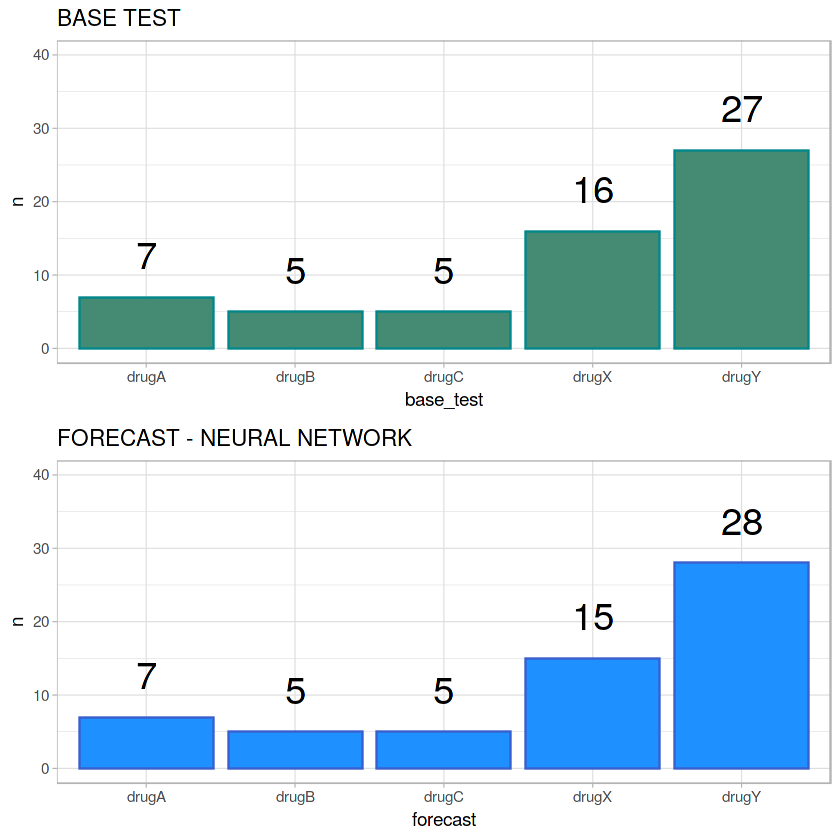

In [200]:
## Grafico comparativo
library(cowplot)
library(gridExtra)


comparation<-cbind(forecast=previsao,base_test=base_teste$drug)
comparation<-as_tibble(comparation)


df<-comparation %>% count(forecast) 

        forecast<-ggplot(data = df,mapping = aes(x=forecast,y= n))+
        geom_col(fill="#1E90FF",color="#3A5FCD")+
            geom_text(aes(label=n),size=8, vjust= -1)+
            ggtitle(label = "FORECAST - NEURAL NETWORK")+
            ylim(0,40)+
             theme_light()

df2<-comparation %>% count(base_test)

   base_test<-ggplot(data = df2,mapping = aes(x=base_test,y= n))+
        geom_col(fill="#458B74",color="#00868B")+
            geom_text(aes(label=n),size=8, vjust=-1)+
            ggtitle(label = "BASE TEST")+
                ylim(0,40)+
                theme_light()

grid.arrange(base_test,forecast)

# naive bayes


In [201]:
library(e1071)
mdl_NV<-naiveBayes(formula = drug ~.,data = base_treinamento)


## Predict

In [202]:
previsao<-predict(mdl_NV,base_teste[,1:5])
previsao<-as.character(previsao)
m_confusao<-table(previsao,base_teste$drug)

# Accuracy

In [203]:
library(caret)
confusionMatrix(m_confusao)

Confusion Matrix and Statistics

        
previsao drugA drugB drugC drugX drugY
   drugA     7     0     0     0     4
   drugB     0     5     0     0     0
   drugC     0     0     5     5     1
   drugX     0     0     0     9     2
   drugY     0     0     0     2    20

Overall Statistics
                                          
               Accuracy : 0.7667          
                 95% CI : (0.6396, 0.8662)
    No Information Rate : 0.45            
    P-Value [Acc > NIR] : 5.883e-07       
                                          
                  Kappa : 0.6857          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: drugA Class: drugB Class: drugC Class: drugX
Sensitivity                1.0000      1.00000      1.00000       0.5625
Specificity                0.9245      1.00000      0.89091       0.9545
Pos Pred Value             0.6364      1.00000      0.45455       0.8182
Ne

## NaiveBayes algorithm 76.67%.


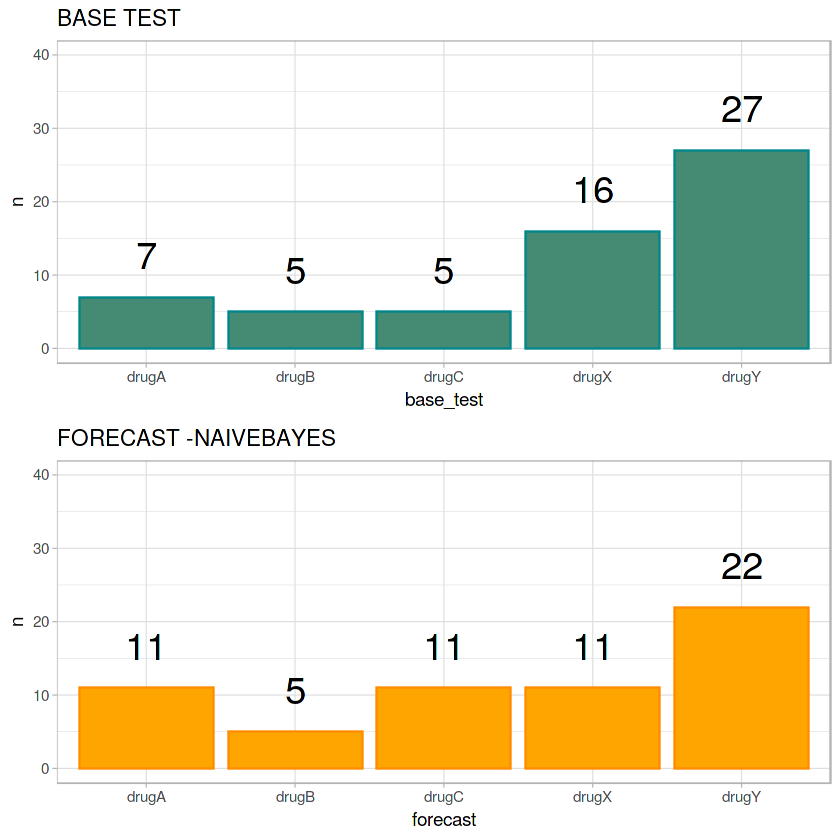

In [204]:
## Grafico comparativo
library(cowplot)
library(gridExtra)


comparation<-cbind(forecast=previsao,base_test=base_teste$drug)
comparation<-as_tibble(comparation)


df<-comparation %>% count(forecast) 

        forecast<-ggplot(data = df,mapping = aes(x=forecast,y= n))+
        geom_col(fill="#FFA500",color="#FF8C00")+
            geom_text(aes(label=n),size=8, vjust= -1)+
            ggtitle(label = "FORECAST -NAIVEBAYES")+
            ylim(0,40)+
             theme_light()

df2<-comparation %>% count(base_test)

   base_test<-ggplot(data = df2,mapping = aes(x=base_test,y= n))+
        geom_col(fill="#458B74",color="#00868B")+
            geom_text(aes(label=n),size=8, vjust=-1)+
            ggtitle(label = "BASE TEST")+
                ylim(0,40)+
                theme_light()

grid.arrange(base_test,forecast)